**2D and 3D Facial Key Point Detection**

Leverage a pre-trained model that can detect the 2D and 3D keypoints present in a face.

In [1]:
!pip install -qU face-alignment

In [17]:
import face_alignment
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import cv2

In [3]:
!wget 'https://www.dropbox.com/s/lpw10qawsc5ipbn/random.JPG'

--2024-08-14 12:00:29--  https://www.dropbox.com/s/lpw10qawsc5ipbn/random.JPG
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/lfn1fjim493ycyfn3868e/random.JPG?rlkey=bocohku3vyl05evm59vq8fezx [following]
--2024-08-14 12:00:30--  https://www.dropbox.com/scl/fi/lfn1fjim493ycyfn3868e/random.JPG?rlkey=bocohku3vyl05evm59vq8fezx
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc406672e7a620635dd442941a6c.dl.dropboxusercontent.com/cd/0/inline/CYmbhSWqm9k6tmhNaKH6ipjn2ib2ZlVBA9S4NJKIviyyzPZCu7opiyjawJKaW1Ch25ZH6bwzeMXJ5uO8J2cQOcMJHSEhXt37ZlYeTTo5FTHmTWbheFZpF4pWurYlEC88fZrtuBljrpJDZj3PCj8i80iw/file# [following]
--2024-08-14 12:00:30--  https://uc406672e7a620635dd442941a6c.dl.dropboxusercontent.com/cd/0/inline/CYmbhSW

In [12]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType['TWO_D'], flip_input = False, device='cpu')

Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100%|██████████| 85.7M/85.7M [00:03<00:00, 28.1MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-cd938726ad.zip" to /root/.cache/torch/hub/checkpoints/2DFAN4-cd938726ad.zip
100%|██████████| 91.9M/91.9M [00:03<00:00, 30.1MB/s]


In [13]:
input = cv2.imread('random.JPG')
preds = fa.get_landmarks(input)[0]
print(preds.shape)

(68, 2)


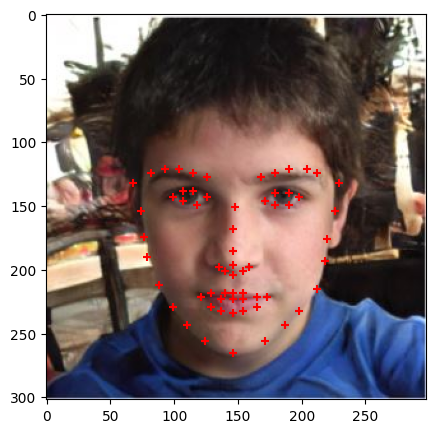

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
img = cv2.imread('random.JPG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.scatter(preds[:, 0], preds[:, 1], marker='+', c='r')
plt.show()

**3D projections of facial keyopoints**

In [18]:
fa = face_alignment.FaceAlignment(
    face_alignment.LandmarksType['THREE_D'],
    flip_input=False,
    device='cpu'
)

Downloading: "https://www.adrianbulat.com/downloads/python-fan/3DFAN4-4a694010b9.zip" to /root/.cache/torch/hub/checkpoints/3DFAN4-4a694010b9.zip
100%|██████████| 91.9M/91.9M [00:03<00:00, 27.6MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/depth-6c4283c0e0.zip" to /root/.cache/torch/hub/checkpoints/depth-6c4283c0e0.zip
100%|██████████| 224M/224M [00:07<00:00, 30.6MB/s]


In [19]:
input = cv2.imread('random.JPG')
preds = fa.get_landmarks(input)[0]
df = pd.DataFrame(preds)
df.columns = ['x', 'y', 'z']
fig = px.scatter_3d(df, x = 'x', y = 'y', z = 'z')
fig.show()